-- Epoch 1
Norm: 0.98, NNZs: 21, Bias: -0.474000, T: 349334, Avg. loss: 0.578322
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.96, NNZs: 21, Bias: -0.510000, T: 698668, Avg. loss: 0.577572
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 0.97, NNZs: 21, Bias: -0.520000, T: 1048002, Avg. loss: 0.577652
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 21, Bias: -0.484000, T: 1397336, Avg. loss: 0.577552
Total training time: 0.23 seconds.
-- Epoch 5
Norm: 1.00, NNZs: 21, Bias: -0.482000, T: 1746670, Avg. loss: 0.577520
Total training time: 0.29 seconds.
-- Epoch 6
Norm: 0.97, NNZs: 21, Bias: -0.516000, T: 2096004, Avg. loss: 0.577564
Total training time: 0.34 seconds.
Convergence after 6 epochs took 0.34 seconds


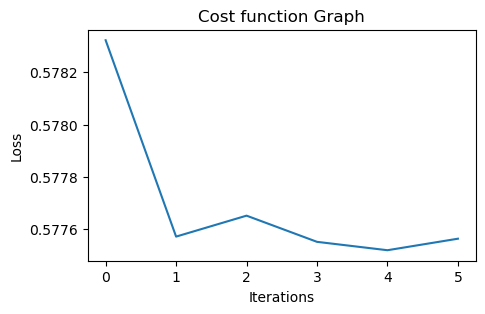

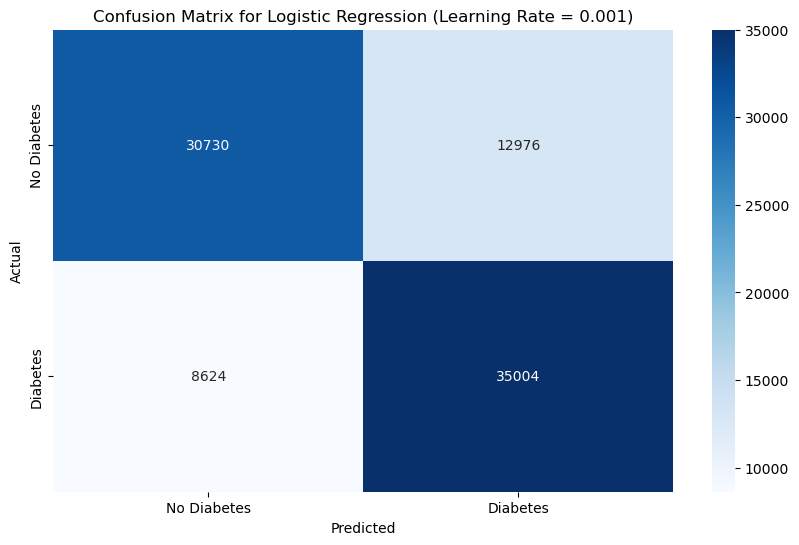

Classification Report for Logistic Regression (Learning Rate = 0.001):
              precision    recall  f1-score   support

           0       0.78      0.70      0.74     43706
           1       0.73      0.80      0.76     43628

    accuracy                           0.75     87334
   macro avg       0.76      0.75      0.75     87334
weighted avg       0.76      0.75      0.75     87334

Specificity:         70.3 

Sensitivity:         80.2 (Recall)
-- Epoch 1
Norm: 1.14, NNZs: 21, Bias: -0.500000, T: 349334, Avg. loss: 0.607029
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 1.17, NNZs: 21, Bias: -0.630000, T: 698668, Avg. loss: 0.606732
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 21, Bias: -0.480000, T: 1048002, Avg. loss: 0.607263
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 1.19, NNZs: 21, Bias: -0.490000, T: 1397336, Avg. loss: 0.607105
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 1.13, NNZs: 21, Bias: -0.480000, T: 1746670, Avg. loss: 

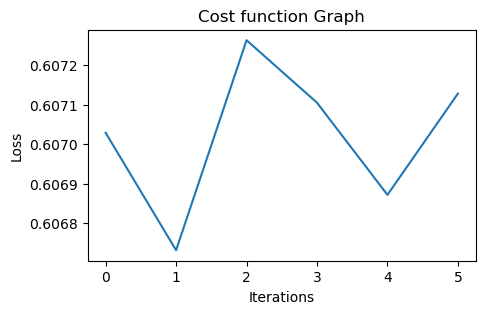

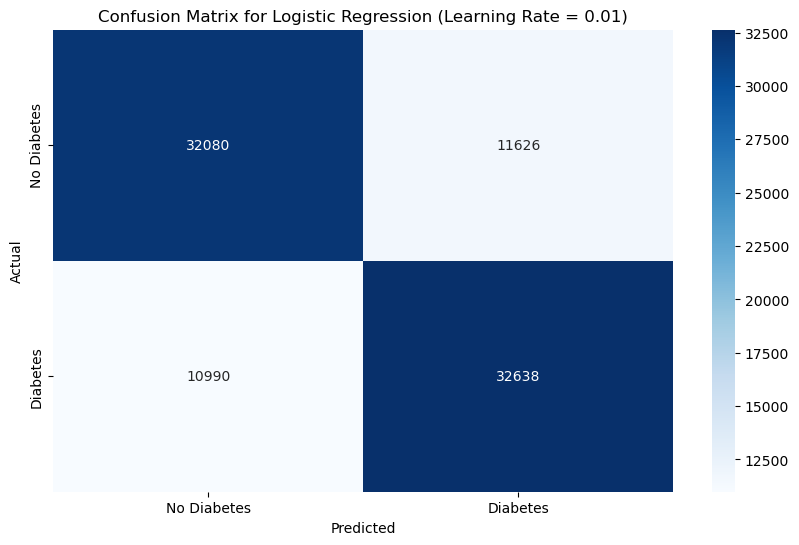

Classification Report for Logistic Regression (Learning Rate = 0.01):
              precision    recall  f1-score   support

           0       0.74      0.73      0.74     43706
           1       0.74      0.75      0.74     43628

    accuracy                           0.74     87334
   macro avg       0.74      0.74      0.74     87334
weighted avg       0.74      0.74      0.74     87334

Specificity:         73.4 

Sensitivity:         74.8 (Recall)
-- Epoch 1
Norm: 2.37, NNZs: 21, Bias: -0.500000, T: 349334, Avg. loss: 0.934611
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 2.59, NNZs: 21, Bias: -1.100000, T: 698668, Avg. loss: 0.934703
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 3.50, NNZs: 21, Bias: -1.000000, T: 1048002, Avg. loss: 0.935810
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3.04, NNZs: 21, Bias: -0.900000, T: 1397336, Avg. loss: 0.934668
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 2.58, NNZs: 21, Bias: -0.300000, T: 1746670, Avg. loss: 0

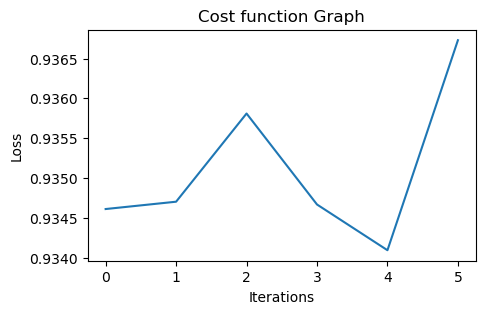

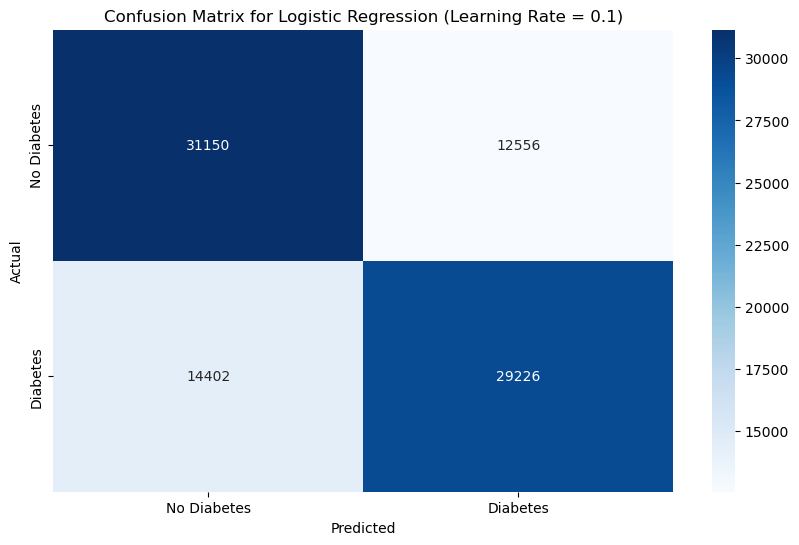

Classification Report for Logistic Regression (Learning Rate = 0.1):
              precision    recall  f1-score   support

           0       0.68      0.71      0.70     43706
           1       0.70      0.67      0.68     43628

    accuracy                           0.69     87334
   macro avg       0.69      0.69      0.69     87334
weighted avg       0.69      0.69      0.69     87334

Specificity:         71.3 

Sensitivity:         67.0 (Recall)


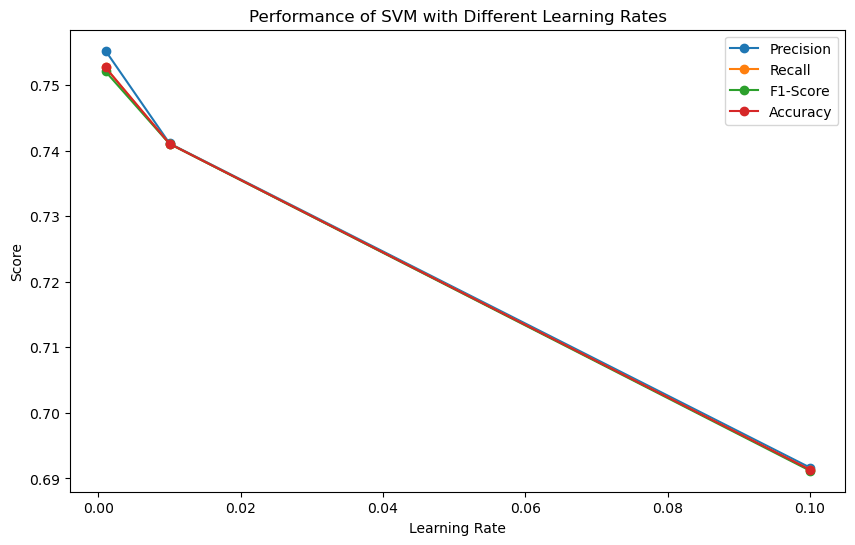

In [8]:
    import pandas as pd
    import numpy as np
    from sklearn.utils import resample
    from imblearn.over_sampling import SMOTE
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import SGDClassifier
    import scipy 
    from scipy import stats 
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
    from ucimlrepo import fetch_ucirepo 
    import sys 
    from io import StringIO
    import seaborn as sns
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.pipeline import Pipeline
    
    def standardize_data(data):
        data_standardized = data.copy()
        names = data.columns
        for name in names:
            data_standardized[name] = stats.zscore(data[name])
        return data_standardized
    
    # Fetch dataset
    cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
    
    # Data (as pandas dataframes)
    X = cdc_diabetes_health_indicators.data.features
    y = cdc_diabetes_health_indicators.data.targets
    
    X = standardize_data(X)
    
    over  = SMOTE(random_state=42)
    under = RandomUnderSampler(sampling_strategy='auto', random_state=42)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    X, y = pipeline.fit_resample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Logistic Regression models with different learning rates
    learning_rates = [0.001, 0.01, 0.1]
    log_reg_models = []
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    
    for lr in learning_rates:
        old_stdout = sys.stdout
        sys.stdout = mystdout = StringIO()
        logr = SGDClassifier(loss='hinge',learning_rate='constant',eta0=lr,max_iter=1000,random_state=42,verbose=3)
        log_reg_models.append(logr)
        logr.fit(X_train, np.ravel(y_train,order='C'))#y_resampled_smote)
        sys.stdout = old_stdout
        loss_history = mystdout.getvalue()
        loss_list = []
        for line in loss_history.split('\n'):
            print(line)
            if(len(line.split("loss: ")) == 1):
                continue
            loss_list.append(float(line.split("loss: ")[-1]))
            
        plt.figure()
        plt.plot(np.arange(len(loss_list)), loss_list)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.title('Cost function Graph')
        plt.rcParams["figure.figsize"] = (5,3)
    
        y_pred = logr.predict(X_test)
    
        #metrics['accuracy'].append(logr.score(X_test, y_test))
        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['precision'].append(precision_score(y_test, y_pred, average='weighted'))
        metrics['recall'].append(recall_score(y_test, y_pred, average='weighted'))
        metrics['f1'].append(f1_score(y_test, y_pred, average='weighted'))
    
        # Plot confusion matrix for each learning rate
        plt.figure(figsize=(10, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
        plt.title(f'Confusion Matrix for Logistic Regression (Learning Rate = {lr})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
    
        # Print classification report for each learning rate
        print(f'Classification Report for Logistic Regression (Learning Rate = {lr}):\n{classification_report(y_test, y_pred)}')
        TN, FP    = cm[0, 0], cm[0, 1]
        FN, TP    = cm[1, 0], cm[1, 1]
        print('Specificity:        ',  round(TN / float(TN + FP),3)*100, "\n")
        print('Sensitivity:        ',  round(TP / float(TP + FN),3)*100, "(Recall)")
    # Plot the metrics of Logistic Regression models in a single graph
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, metrics['precision'], marker='o', label='Precision')
    plt.plot(learning_rates, metrics['recall'], marker='o', label='Recall')
    plt.plot(learning_rates, metrics['f1'], marker='o', label='F1-Score')
    plt.plot(learning_rates, metrics['accuracy'], marker='o', label='Accuracy')
    
    plt.title("Performance of SVM with Different Learning Rates")
    plt.xlabel("Learning Rate")
    plt.ylabel("Score")
    plt.legend()
    plt.show()